<a href="https://colab.research.google.com/github/zzcn23/ZoeCannU2proj.ipynb/blob/main/ZoeCannU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

#importing libraries, we need to reimport each time I open this project


import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


Since its suddently been getting cooler and I love fall weather, I wanted to predict what the rest of the weather this month would be. I was also curious if our weather was following the same pattern as last October. So I decided to use the data from last year and  my observations about the weather this month to try to predict what our weather will look like for the rest of october.

In [105]:
# data of highs during each day of october in 2022 and 2023
oct_highs_2022 = [64,  84, 88, 91, 90, 91, 86, 90, 88, 90,90, 97, 90, 90, 93, 91, 75, 70, 75,86, 88, 88, 88, 84, 75, 80, 81, 63,72,77,79]
oct_highs_2023 = [79,93, 93,97, 79, 86, 75, 79, 84, 81, 70, 82, 93, 79,73, 73, 75, 82, 88, 97, 91,90, 81, 79, 81, 79, 88, 88,54, 46,61]

In [107]:
#compiled octobers from both years
data_temp = np.array(oct_highs_2022 + oct_highs_2023)

(array([ 1.,  1.,  1.,  2.,  5., 13., 10., 22.,  7.]),
 array([46.        , 51.66666667, 57.33333333, 63.        , 68.66666667,
        74.33333333, 80.        , 85.66666667, 91.33333333, 97.        ]),
 <BarContainer object of 9 artists>)

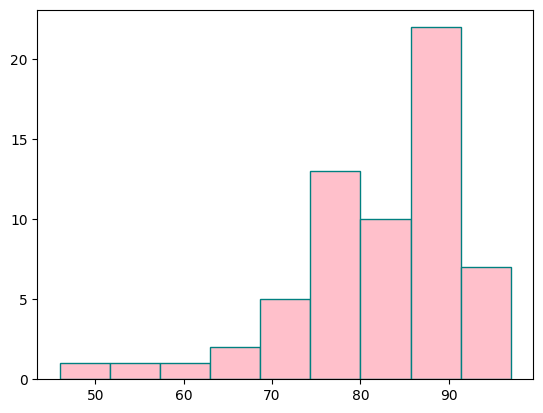

In [218]:
# Now I visualize the raw data as a histogram
plt.hist(data_temp, bins=9, edgecolor='teal', color='pink')

For my prior I decided to use a strong prior because I think I have pretty accurate observations about weather this month that I want to influence the posteriot. I decided to use Gamma for my first one because its a continuous distribution with positive values and is pretty flexible. It also influences the posterior more than a distribution like uniform.

I also chose those alpha and beta values for my prior because I think the weather this month hasn't had a ton of variability and was mostly high temperatures before quickly getting colder and this graph illustrates that.

<Axes: >

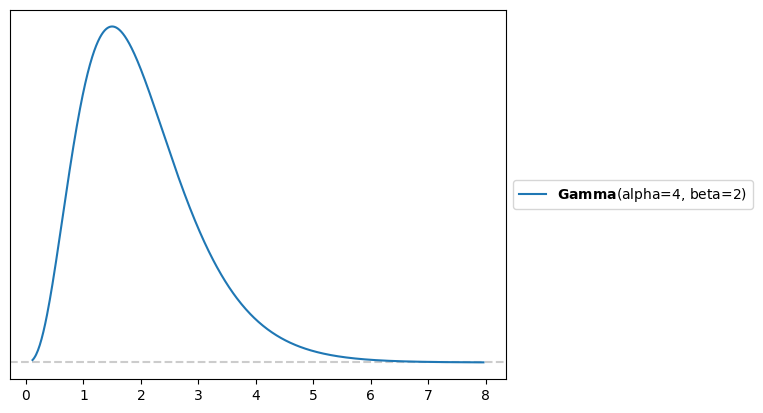

In [222]:
pz.Gamma(alpha=4, beta=2).plot_pdf()

I did Half normal as my second prior because its positive and flexible. I chose 10 because it allows for a range of variation but not too much since the temperature has been mostly 80s.

<Axes: >

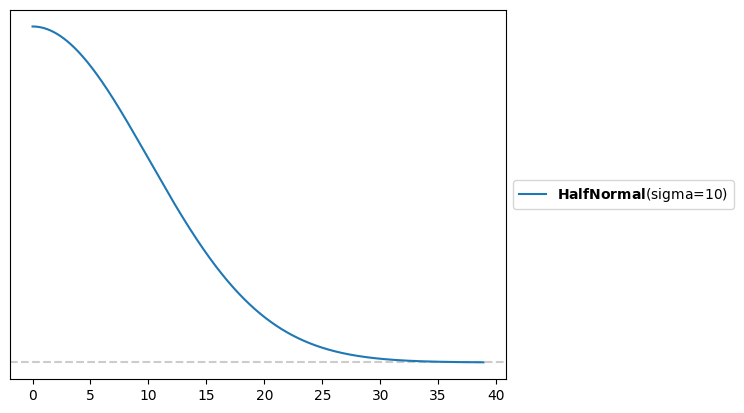

In [223]:
pz.HalfNormal(sigma=10).plot_pdf()

Here I'm combining my data and priors to make a posterior

In [224]:
with pm.Model() as model_temp:
    alpha = pm.Gamma('alpha', alpha=4, beta=2)
    beta = pm.HalfNormal('beta', sigma=10)

    # Likelihood of the observations
    Y = pm.Weibull('Y', alpha=alpha, beta=beta, observed=data_temp)

    # Inference
    idata_temp = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>], dtype=object)

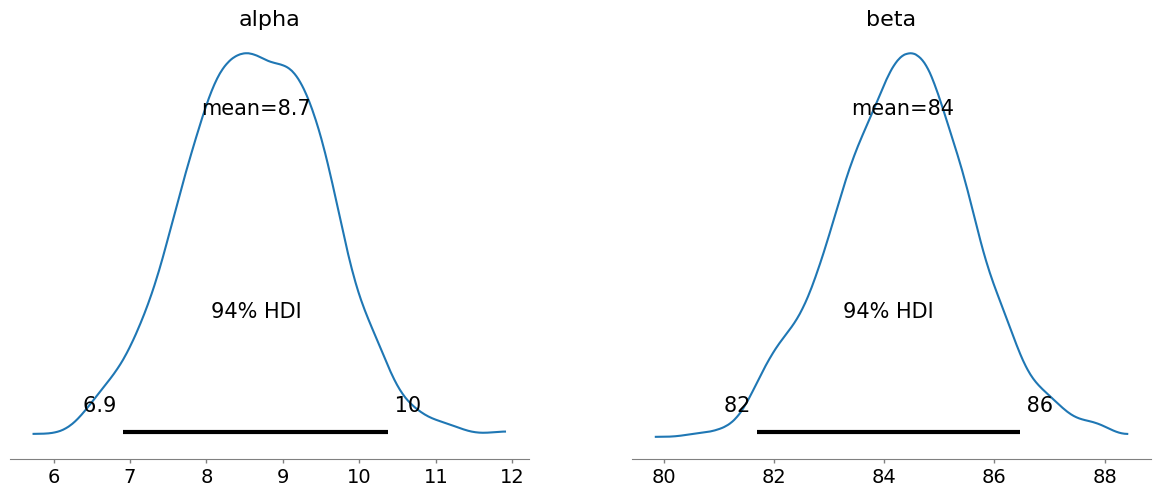

In [225]:
az.plot_posterior(idata_temp)

array([[<Axes: >, None],
       [<Axes: xlabel='alpha', ylabel='beta'>, <Axes: >]], dtype=object)

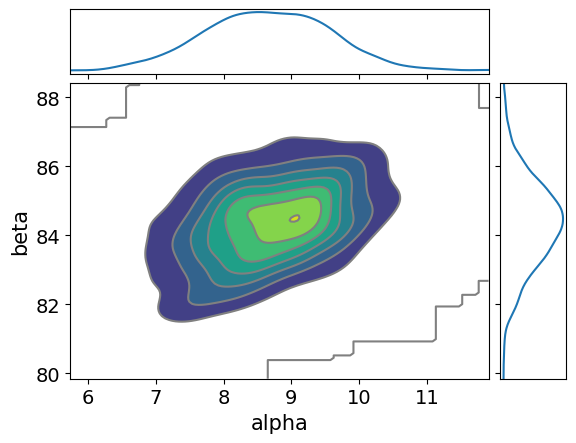

In [226]:
az.plot_pair(idata_temp, kind='kde', marginals=True)

In [227]:
pm.sample_posterior_predictive(idata_temp, model=model_temp, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

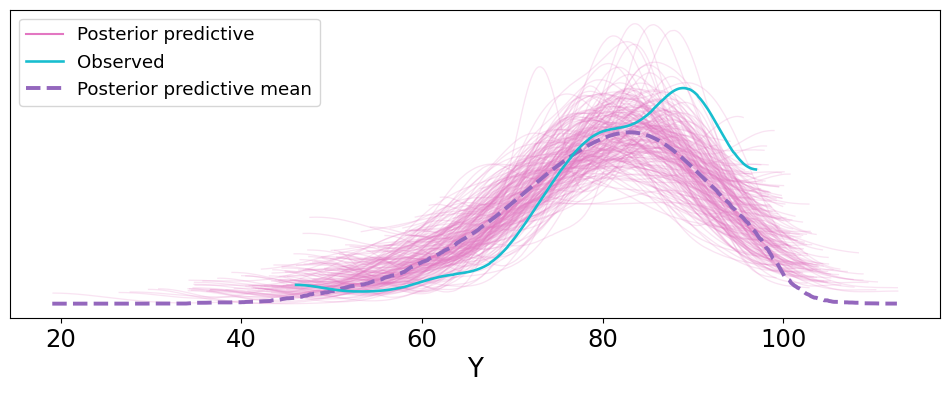

In [228]:
az.plot_ppc(idata_temp, num_pp_samples=200, figsize=(12, 4), colors=["C6", "C19", "C4"])

I think this model is pretty accurate and the best I could do with the distributions I know about. The data fits the mean relatively well with some variation on he rightmost end but its still generally within the posterior predictive.
The Weibull distribution also works well because its left skewed like my data and is continuous.
I think the this model is accurate because the weather so far this month has been 80s and 90s and since its probably getting into the 60s and 50s soon the mean would be in the low 80s with a somewhat wide variability.
It's also pretty realistic so far into the month since its been hot but I'll have to see where the weather goes.
If I had to do this again, I'd add more data points and look into storms and hurricanes occuring now and how they might impact the weather.

#Take 1- Weather Data

For my prior, I chose to use a normal distribution because I think I can make a pretty precise and accurate guess about the weather in october this month and I want that to influence the posterior more. Since so far into October its been pretty hot with the exception of the past couple days, I would guess the average temperature is 80-85 with not very much variation throughout the month.


<Axes: >

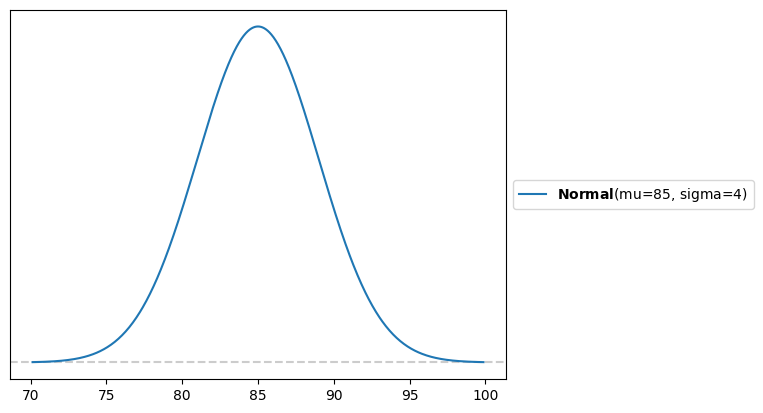

In [142]:
#mean=85 because I feel like its been pretty hot except for the last few days
#standard deviation=4 because I feel like the weather has been mostly the same
pz.Normal(mu=85, sigma=10).plot_pdf()

I chose this prior because I also wanted to influence the standard deviation and I think i have accurate estimates about how much variance there has been in the weather (not a lot)

<Axes: >

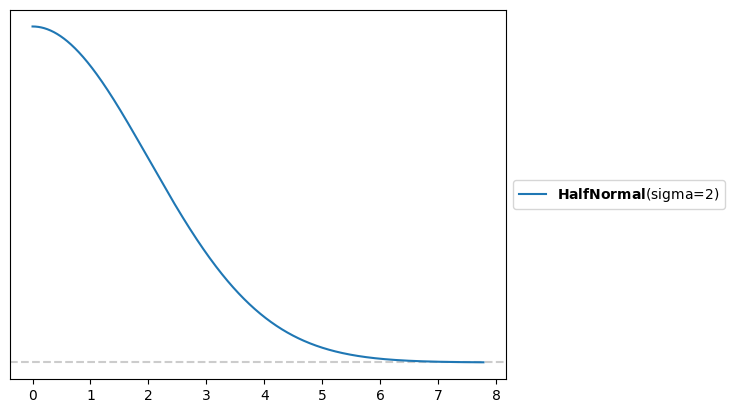

In [166]:
pz.HalfNormal(sigma=10).plot_pdf()

Now I'm combining my prior and using my data for a likelihood to find my posterior. I'm using Gamma because its a continuous model with positive data that I think will showcase my posterior well

In [194]:
 with pm.Model() as model_temp:
    θ = pm.Normal('θ', mu=85, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood of the observations
    Y = pm.Normal('Y', mu= θ, sigma=sigma, observed=data_temp)

    # Inference
    idata_temp = pm.sample(2000)

Output()

Output()

array([<Axes: title={'center': 'sigma'}>, <Axes: title={'center': 'θ'}>],
      dtype=object)

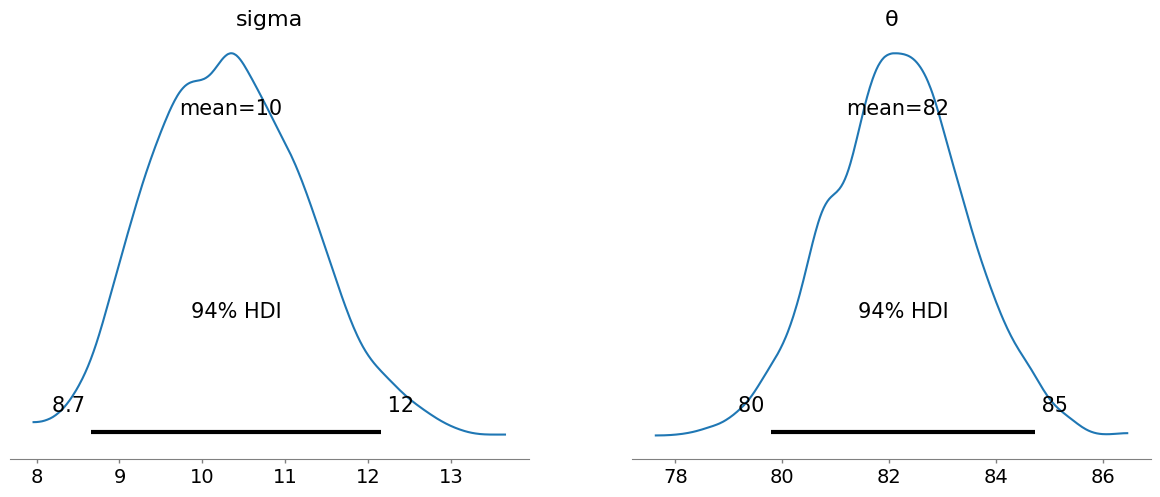

In [195]:
az.plot_posterior(idata_temp)

array([[<Axes: >, None],
       [<Axes: xlabel='sigma', ylabel='θ'>, <Axes: >]], dtype=object)

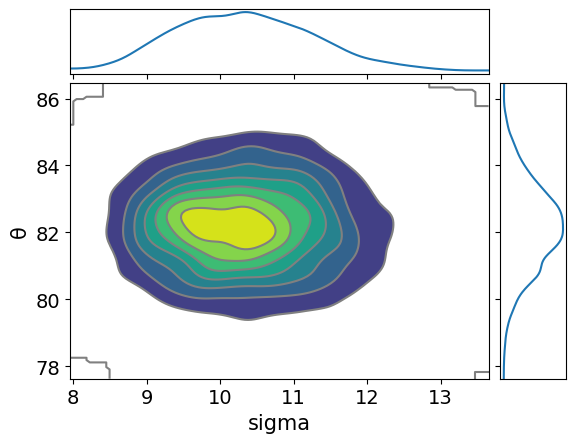

In [196]:
az.plot_pair(idata_temp, kind='kde', marginals=True)

In [197]:
pm.sample_posterior_predictive(idata_temp, model=model_temp, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

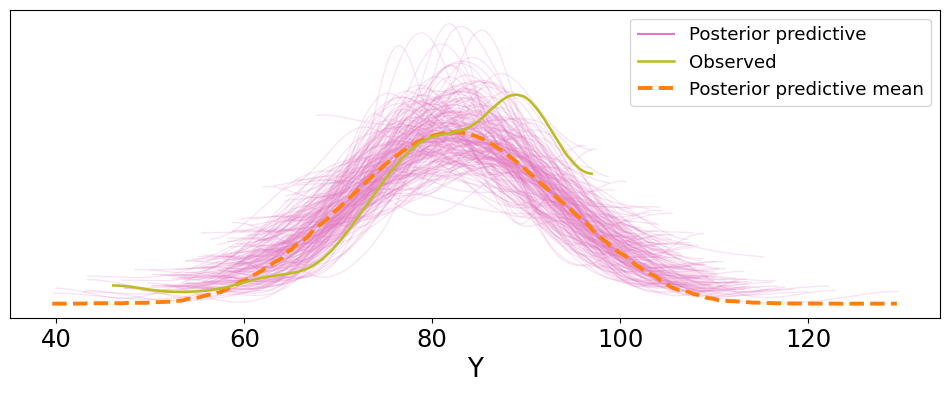

In [198]:
az.plot_ppc(idata_temp, num_pp_samples=200, figsize=(12, 4), colors=["C6", "C8", "C11"])

Its an okay model but the observed data isnt close enough to the mean so I'm going to do a different distribution


The two "takes" below are when I was trying to analyze flight data into austin and used different models but then realized I didn't have enough data points to make an accurate posterior and switched to weather

#Take 1- Flight Data

In [ ]:
#unifrom prior
# 500000 is around lowest
# 1900000 is about highest
pz.Uniform(2000000,500000).plot_pdf()

<Axes: >

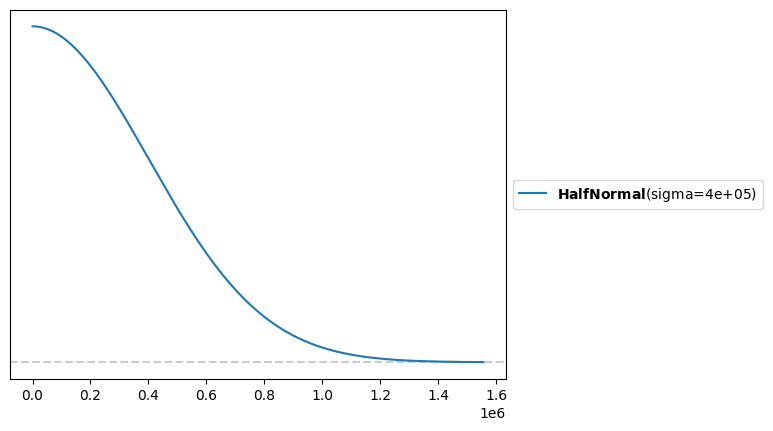

In [ ]:
pz.HalfNormal(sigma = 400000).plot_pdf()

In [ ]:
#got mu from middle value in uniform distribution and sigma from half normal

In [ ]:
#G for gamma
with pm.Model() as model_austinG:

    μ = pm.Uniform('μ', lower=500000, upper=1900000)

    σ = pm.HalfNormal('σ', sigma=400000.)

    #new likelihood, with two priors
    Y = pm.Gamma('Y', mu = μ, sigma = σ, observed=data_austin)
    idata_austinG = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

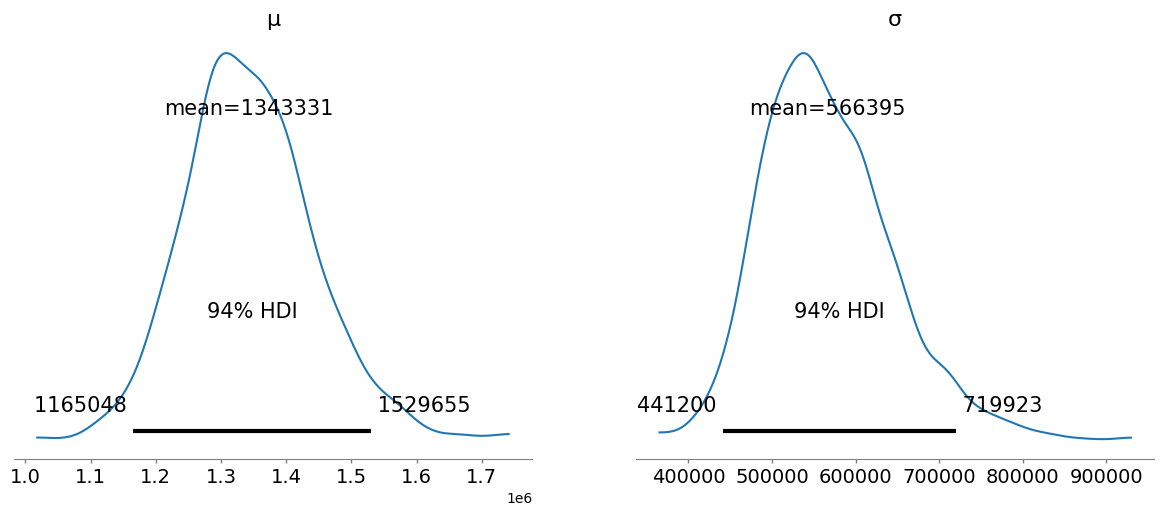

In [ ]:
az.plot_posterior(idata_austinG)

In [ ]:
az.plot_pair(idata_austinG, kind='kde', marginals=True)


NameError: name 'idata_austinG' is not defined

In [ ]:
pm.sample_posterior_predictive(idata_austinG, model=model_austinG, extend_inferencedata=True)

NameError: name 'idata_austinG' is not defined

In [ ]:
az.plot_ppc(idata_austinG, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

NameError: name 'idata_austinG' is not defined

mean is right even though shape doesnt match


#Take2- Flight Data

In [ ]:
#S for Skew Normal
with pm.Model() as model_austinS:

    μ = pm.Uniform('μ', lower=500000, upper=1900000)

    σ = pm.HalfNormal('σ', sigma=400000.)

    #new likelihood, with two priors
    Y = pm.SkewNormal('Y', mu= μ, sigma= σ, observed=data_austin)
    idata_austinS= pm.sample()

In [ ]:
az.plot_posterior(idata_austinS)

In [ ]:
pm.sample_posterior_predictive(idata_austinS, model=model_austinG, extend_inferencedata=True)

In [ ]:
az.plot_ppc(idata_austinS, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])